In [1]:
%matplotlib notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
df = pd.read_csv('telecom_churn_data.csv')

In [6]:
print(df.shape)
df.head()

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [7]:
df.nunique()

mobile_number           99999
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6            6512
roam_ic_mou_7            5230
roam_ic_mou_8            5315
roam_ic_mou_9            4827
roam_og_mou_6            8038
roam_og_mou_7            6639
roam_og_mou_8            6504
roam_og_mou_9            5882
loc_og_t2t_mou_6        13539
                        ...  
arpu_2g_9                6795
night_pck_user_6            2
night_pck_

### Lets observe the null values

In [8]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)),2)

In [9]:
len(nul_percentage[nul_percentage>70])

40

* There are more than 40 columns where there is more than 70% of missing data

In [10]:
df.filter(like = "date", axis =1).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

* mobile number is unique for each user; lets conver that column to string as there is no valid point to make any analysis on the same.
* several date columns are available.
* After observing the data ,there are some categorical variables also; lets seggregate the same.

In [11]:
categorical_vars = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
"night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

In [12]:
df[categorical_vars].isnull().sum()

night_pck_user_6    74846
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
fb_user_6           74846
fb_user_7           74428
fb_user_8           73660
fb_user_9           74077
dtype: int64

In [13]:
print(df[categorical_vars].nunique())
for col in categorical_vars:
    print(col, df[col].unique())

night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
night_pck_user_9    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
fb_user_9           2
dtype: int64
night_pck_user_6 [ 0. nan  1.]
night_pck_user_7 [ 0. nan  1.]
night_pck_user_8 [ 0. nan  1.]
night_pck_user_9 [nan  0.  1.]
fb_user_6 [ 1. nan  0.]
fb_user_7 [ 1. nan  0.]
fb_user_8 [ 1. nan  0.]
fb_user_9 [nan  1.  0.]


* >(>74%) data is missing; As this is a categorical values lets impute the missing value by '-1' as new category and create dummies.

In [14]:
for col in categorical_vars:
    df[col].fillna(value=-1, inplace=True)

#### Create Dummies for 6,7,8 months; 9th month is not required as its required to analyze the if the user is churned or not?

In [15]:
df_night_6 = pd.get_dummies(df['night_pck_user_6'],prefix="night_6",drop_first=True)
df_night_7 = pd.get_dummies(df['night_pck_user_7'],prefix="night_7",drop_first=True)
df_night_8 = pd.get_dummies(df['night_pck_user_8'],prefix="night_8",drop_first=True)

df_fb_6 = pd.get_dummies(df['fb_user_6'],prefix="fb_6", drop_first=True)
df_fb_7 = pd.get_dummies(df['fb_user_7'],prefix="fb_7",drop_first=True)
df_fb_8 = pd.get_dummies(df['fb_user_8'],prefix="fb_8",drop_first=True)

telecom = pd.concat([df,df_night_6],axis=1)
telecom = pd.concat([df,df_night_7],axis=1)
telecom = pd.concat([df,df_night_8],axis=1)

telecom = pd.concat([df,df_fb_6],axis=1)
telecom = pd.concat([df,df_fb_7],axis=1)
telecom = pd.concat([df,df_fb_8],axis=1)

In [16]:
df.drop(labels=categorical_vars, axis=1, inplace=True)

In [17]:
df.shape

(99999, 218)

* lets recheck the missing value percentage

In [18]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)),2)
print(sorted(nul_percentage, reverse=True))

[74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 4.76, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.62, 1.77, 1.66, 1.61, 1.1, 1.02, 1.02, 1.02, 0.6, 0.0, 0.0, 0.0, 0.0, 0

In [19]:
nul_percentage[nul_percentage>70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

* > If you observe there are two main columns which are required to calculate the amount of recharge to determine if the user is churned or not. lets impute the missing values for the below columns before proceeding further

* total_rech_data_6           74.85
* total_rech_data_7           74.43
* total_rech_data_8           73.66
* total_rech_data_9           74.08

* av_rech_amt_data_6          74.85
* av_rech_amt_data_7          74.43
* av_rech_amt_data_8          73.66
* av_rech_amt_data_9          74.08

In [20]:
cols_imp = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", "av_rech_amt_data_6", "av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9"]
df[cols_imp].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_rech_data_6,25153.0,2.463802,2.789128,1.0,1.0,1.0,3.0,61.0
total_rech_data_7,25571.0,2.666419,3.031593,1.0,1.0,1.0,3.0,54.0
total_rech_data_8,26339.0,2.651999,3.074987,1.0,1.0,1.0,3.0,60.0
total_rech_data_9,25922.0,2.441170,2.516339,1.0,1.0,2.0,3.0,84.0
av_rech_amt_data_6,25153.0,192.600982,192.646318,1.0,82.0,154.0,252.0,7546.0
av_rech_amt_data_7,25571.0,200.981292,196.791224,0.5,92.0,154.0,252.0,4365.0
av_rech_amt_data_8,26339.0,197.526489,191.301305,0.5,87.0,154.0,252.0,4076.0
av_rech_amt_data_9,25922.0,192.734315,188.400286,1.0,69.0,164.0,252.0,4061.0


<IPython.core.display.Javascript object>


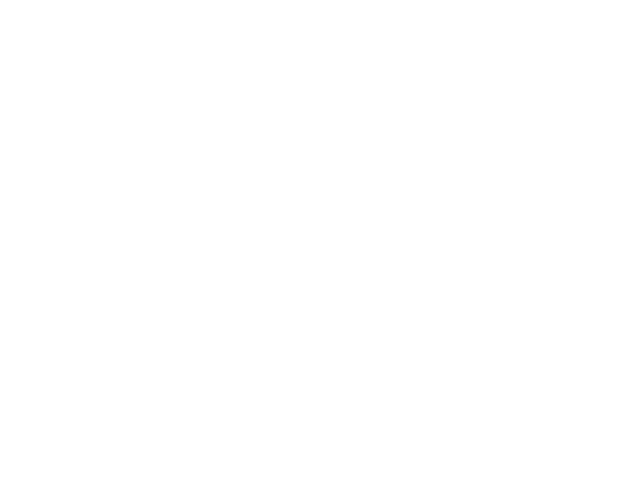

In [21]:
df['total_rech_amt_6'].plot.hist(bins=100)

In [22]:
for col in cols_imp:
    df[col].fillna(value=0, inplace=True)

In [23]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)),2)
print(sorted(nul_percentage, reverse=True))
print('-'*50)
print(nul_percentage[nul_percentage>70])

[74.85, 74.85, 74.85, 74.85, 74.85, 74.85, 74.43, 74.43, 74.43, 74.43, 74.43, 74.43, 74.08, 74.08, 74.08, 74.08, 74.08, 74.08, 73.66, 73.66, 73.66, 73.66, 73.66, 73.66, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 5.38, 4.76, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.94, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.62, 1.77, 1.66, 1.61, 1.1, 1.02, 1.02, 1.02, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

####  As the missing values for the colums is more than 74%, we can delete the above columns; But date columns can be used to derive new variables; Before deriving the same lets build the churn data for the users based on the below mentioned


1. Analyse the recharge colums and fill missing values for "As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)."
2. Filter high-value customers As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). # total_rech_data_6 # total_rech_data_7 # av_rech_amt_data_6 # av_rech_amt_data_7 

In [24]:
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7
df['total_data_rech_8'] = df.total_rech_data_8 * df.av_rech_amt_data_8
df['total_data_rech_9'] = df.total_rech_data_9 * df.av_rech_amt_data_9

In [25]:
df['total_amt_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['total_amt_7'] = df.total_rech_amt_7 + df.total_data_rech_7
df['total_amt_8'] = df.total_rech_amt_8 + df.total_data_rech_8
df['total_amt_9'] = df.total_rech_amt_9 + df.total_data_rech_9

In [26]:
cols_to_drop = ['total_rech_data_6', 'total_rech_data_7','total_rech_data_8','total_rech_data_9',
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
               'total_data_rech_6','total_data_rech_7','total_data_rech_8','total_data_rech_9']
df.drop(labels=cols_to_drop, axis=1, inplace=True)
print(df.shape)

(99999, 214)


* Filter high-value customers As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). 

In [27]:
df['av_amt_rech_6_7']=(df.total_amt_6 + df.total_amt_7)/2

In [28]:
df['av_amt_rech_6_7'].plot.box()

In [29]:
df['av_amt_rech_6_7'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0        0.0
0.1       60.0
0.2      108.5
0.3      155.0
0.4      209.5
0.5      275.0
0.6      360.0
0.7      478.0
0.8      656.5
0.9     1028.0
1.0    61236.0
Name: av_amt_rech_6_7, dtype: float64

In [30]:
avg_amt_rech_2_mon = df['av_amt_rech_6_7'].quantile(0.7)

In [31]:
filter = (df['av_amt_rech_6_7'] >= avg_amt_rech_2_mon)

In [32]:
df = df[filter]
print(df.shape)

(30001, 215)


 *  After filtering the high-value customers, you should get about 29.9k rows3. Tag churners and remove attributes of the churn phase Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are: 
  * total_ic_mou_9 
  * total_og_mou_9 
  * vol_2g_mb_9 
  * vol_3g_mb_9
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names). 
    
* After applying filter we have around 30k rows ( ~ 100 rows extra - Need to check what else missed to take into account )

In [33]:
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,30001.000000,30001.000000,30001.000000,30001.000000
mean,264.901497,500.869219,91.435910,349.513848
std,358.290694,666.902007,282.370006,947.079372
min,0.000000,0.000000,0.000000,0.000000
25%,50.480000,47.640000,0.000000,0.000000
50%,157.980000,284.940000,0.000000,0.000000
75%,343.540000,698.680000,38.000000,320.610000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [34]:
def isUserChurn(df):
  if(df['total_ic_mou_9'] > 0 or df['total_og_mou_9'] > 0 or df['vol_2g_mb_9'] > 0 or df['vol_3g_mb_9'] > 0):
    return 0
  else:
    return 1

In [35]:
df['churn'] = df.apply(isUserChurn, axis=1)

In [36]:
df.shape

(30001, 216)

In [37]:
# dropping 9th month cols
cols_to_drop = (list(df.filter(like ='_9', axis =1).columns))

In [38]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [39]:
cols_to_drop = list(df.filter(like='sep', axis=1).columns)
print(cols_to_drop)

['sep_vbc_3g']


In [40]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [41]:
unique_Values = df.apply(lambda x: x.nunique())
# print(unique_Values)

In [42]:
unique_Values[unique_Values==1]

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
dtype: int64

In [43]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 164 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float

In [44]:
df.shape

(30001, 164)

#### Convert date columns to Date object and derive new variable

In [45]:
date_cols = list(df.filter(like='date', axis=1).columns)
print(len(date_cols), date_cols)

9 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


<font color=red>Taking some time to run</font>

In [46]:
for date_col in date_cols:
    df[date_col]=pd.to_datetime(df[date_col])

In [47]:
df['date_last_rech'] = df[['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8']].max(axis=1)

In [48]:
df[['date_last_rech']].isnull().sum()

date_last_rech    0
dtype: int64

In [49]:
df['date_last_rech_data'] = df[['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_7']].max(axis=1)

In [50]:
df['date_last_rech_data'].isnull().sum()

10501

* Now we have date of last recharge; lets convert to days from last recharge; since we are considering only till 8th month(Aug); Need to find the diff from 31 Aug to the column value

In [51]:
df['days_since_last_recharge'] = df['date_last_rech'].apply(lambda x: datetime(2014, 8, 31) - x)

In [52]:
df['days_since_last_recharge'] = df['days_since_last_recharge'].apply(lambda x: x.days)

In [53]:
# df['days_since_last_recharge']

In [54]:
df['days_since_last_recharge_data'] = df['date_last_rech_data'].apply(lambda x: datetime(2014, 8, 31) - x)

In [55]:
df['days_since_last_recharge_data'] = df['days_since_last_recharge_data'].apply(lambda x: x.days)

In [56]:
df['days_since_last_recharge_data'].isnull().sum()

10501

* <font color=green>In case of missing values lets assume user didnt recharged the same. so lets fill the missing values with max value 90 (assuming number of days in 3 months days)</font>

In [57]:
df['days_since_last_recharge_data'] = df['days_since_last_recharge_data'].fillna(90)

* <font color='green'>Usage includes both data/voice; so lets finalize the days since last recharge as min(voice, data)</font>

In [58]:
df['days_since_last_rech'] = df[['days_since_last_recharge_data', 'days_since_last_recharge']].min(axis=1)

#### <font color='blue'> New Derived Variable =  days_since_last_rech </font>

* Lets remove all date related columns and intermediate derived variables

In [59]:
date_cols = list(df.filter(like='date', axis=1).columns)
print(len(date_cols), date_cols)

11 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_last_rech', 'date_last_rech_data']


In [60]:
df.drop(labels=date_cols, axis=1,inplace=True)

#### Lets clean up the data, where there is no variance explained

In [61]:
unique_Values = df.apply(lambda x: x.nunique())

In [62]:
unique_Values[unique_Values==1]

circle_id           1
loc_og_t2o_mou      1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
dtype: int64

In [63]:
cols_to_drop = list(unique_Values[unique_Values==1].index)

In [64]:
df.shape

(30001, 158)

In [65]:
len(cols_to_drop)

10

In [66]:
df.drop(labels=cols_to_drop,axis=1, inplace=True)

In [67]:
df.shape

(30001, 148)

In [68]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)),2)
print(sorted(nul_percentage, reverse=True))
print('-'*50)
print(nul_percentage[nul_percentage>40])

[46.83, 46.83, 46.83, 46.83, 46.83, 44.15, 44.15, 44.15, 44.15, 44.15, 43.15, 43.15, 43.15, 43.15, 43.15, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------------------------
max_rech_data_6    44.15
max_rech_data_7    43.15
max_rech_data_8    46.83
count_rech_2g_6    44.

In [69]:
cols_to_drop = nul_percentage[nul_percentage>40].index
print(cols_to_drop, len(cols_to_drop))

Index(['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object') 15


In [70]:
df.shape

(30001, 148)

In [71]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [72]:
df.shape

(30001, 133)

In [73]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)),2)
print(sorted(nul_percentage, reverse=True))

[3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 3.91, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.82, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 1.79, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


#### rows have all missing values

In [74]:
print(df.isnull().all(axis=1).sum())

# sum of misisng values in each row
rows_missing_data = df.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0]

0


0        54
77       27
111      27
188      27
358      27
364      27
414      27
423      27
527      27
539      54
687      81
690      27
723      27
788      27
845      27
895      27
933      27
934      27
1138     54
1255     27
1489     54
1500     54
1524     27
1555     54
1623     27
1754     27
1768     27
1877     27
1952     27
2063     27
         ..
98254    27
98271    27
98317    27
98420    27
98612    27
98635    27
98790    54
98823    27
98872    27
98943    81
98962    27
99000    27
99034    27
99070    27
99135    81
99142    81
99195    27
99246    27
99296    27
99323    27
99338    81
99391    27
99398    27
99436    27
99611    27
99625    27
99700    27
99790    54
99827    27
99851    54
Length: 1497, dtype: int64

In [75]:
rows_missing_data.value_counts()

0     28504
27      992
81      254
54      251
dtype: int64

In [76]:
rows_missing_data.value_counts(normalize=True)

0     0.950102
27    0.033066
81    0.008466
54    0.008366
dtype: float64

* Around 4% of data is missing in the data(across the rows), lets remove those rows

### TODO - check if the below step is necessary

In [77]:
df = (df[df.isnull().sum(axis=1) < 27])

In [78]:
df.shape

(28504, 133)

In [79]:
nul_percentage = round(100*(df.isnull().sum()/len(df.index)),4)
print(sorted(nul_percentage, reverse=True))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [80]:
nul_percentage[nul_percentage>0]

Series([], dtype: float64)

In [81]:
df.isnull().any().any()

False

* As the number of missing values are less than 4%, lets impute the missing values with 0

In [82]:
# df.fillna(0, inplace=True)

In [83]:
print(list(df.columns))

['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_i

In [84]:
cols_to_drop = ['days_since_last_recharge', 'days_since_last_recharge_data',
                'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
                'av_amt_rech_6_7']

In [85]:
df.drop(labels=cols_to_drop, axis=1, inplace=True)

In [86]:
df[['aon']].describe()

,aon
count,28504.000000
mean,1234.055817
std,964.182647
min,180.000000
25%,472.000000
50%,876.000000
75%,1815.000000
max,4321.000000


In [87]:
print(df.aon.min(), df.aon.max())

180 4321


* AON is represented in days, if we observe the min and max value its 180 and 4321 which is 6 months and 144 months; It means we can represent AON in 6 months buckets.

In [88]:
df['aon_bin'] = pd.cut(df['aon'], bins=24, include_lowest=False, labels=np.arange(1,25))

In [89]:
df[['aon','aon_bin']].head(10)

,aon,aon_bin
7,802,4
8,315,1
21,720,4
23,604,3
33,1328,7
38,1155,6
41,2010,11
48,1265,7
53,697,3
56,729,4


In [90]:
df.drop(labels='aon', axis=1, inplace=True)

In [91]:
df['aon_bin'] = df['aon_bin'].astype(int)

In [92]:
# df.info(verbose=1)

## DataCleaning results

In [93]:
df.shape

(28504, 127)

* Initial shape - (99999, 226)
* After cleaning - (28504, 136)

lets save the data frame as cleaned.csv

In [94]:
df.to_csv('telecom_churn_clean.csv', index=False, sep=',')

## EDA

## Modelling

In [4]:
df_churn = pd.read_csv('telecom_churn_clean.csv')

In [5]:
df_churn.equals(df)

NameError: name 'df' is not defined

In [6]:
df_churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_amt_8,churn,days_since_last_rech,aon_bin
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,57.74,19.38,18.74,1580.0,790.0,3638.0,1,5.0,4
1,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,21.03,910.65,122.16,437.0,955.0,327.0,0,1.0,1
2,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0.00,0.00,0.00,600.0,680.0,718.0,0,0.0,4
3,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,1,40.45,51.86,0.00,0.0,1166.0,979.0,0,7.0,3
4,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,0,358.10,2706.83,1714.67,6343.0,23230.0,910.0,0,5.0,7


In [7]:
print(df_churn.shape)
df_churn.info(verbose=1)

(28504, 127)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Data columns (total 127 columns):
mobile_number           int64
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
loc_og_t2t_mou_6        float64
loc_og_t2t_mou_7        float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_6        float64
loc_og_t2m_mou_7        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_6        float64
loc_og_t2f_mou_7        float64
loc_og_t2f_mou_8        float64
loc_og_t2c_mou_6        float64
loc_og_t2c_mou_7        float64
loc_og_t2c_mou_

* Target Variable - CHURN
* Unique Variable - MOBILE NUMBER
* Rest all - Independent Variable

> Mobile number can be dropped as its a identifier variable

In [8]:
# df_churn.drop(labels='mobile_number', axis=1, inplace=True)

In [9]:
X = df_churn.drop(labels='churn', axis=1)
y = df_churn['churn']

* lets observe the target variable (churn)

In [10]:
y.value_counts()

0    26908
1     1596
Name: churn, dtype: int64

In [11]:
y.value_counts(normalize=True)

0    0.944008
1    0.055992
Name: churn, dtype: float64

> There is huge imbalance in the target variable; It consists only 5% of the total data

So before applying, PCA and any other classification model, we need to tackle the imbalance of the Target variable
* Here, we are choosing to apply SMOTE(Synthetic Minority Over-sampling Technique) analysis

Modelling Procedure - 
1. Apply StandardScaler
2. Split data for train and test
3. Apply SMOTE
4. Apply PCA
5. Apply LogisticRegression and SVM for classification
6. Compare metrics and decide on the model

In [ ]:
scaler = StandardScaler().fit(X)

Xscaled = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
print("Train Data Imbalance =\n", y_train.value_counts())
print('-'*50)
print("TEst Data Imbalance =\n",y_test.value_counts())

In [ ]:
print("Train Data Imbalance =\n", y_train.value_counts(normalize=True)*100)
print('-'*50)
print("TEst Data Imbalance =\n",y_test.value_counts(normalize=True)*100)

### Apply SMOTE

In [ ]:
sm = SMOTE(random_state=42)

In [ ]:
X_train_smote,y_train_smote = sm.fit_sample(X_train,y_train)

In [ ]:
print(X_train_smote.shape)
print(y_train_smote.shape)

In [ ]:
print(len(y_train_smote)-np.count_nonzero(y_train_smote))
print(len(y_train)-np.count_nonzero(y_train))

In [ ]:
np.unique(y_train_smote)

In [ ]:
# y_train_smote.count()

In [ ]:
print((y_train_smote != 0).sum()/(y_train_smote == 0).sum())

> After applying SMOTE, we can observe both the classes have same number of samples

### Apply PCA

In [ ]:
pca = PCA(random_state=42, svd_solver='randomized')

In [ ]:
pca.fit(X_train_smote)

In [ ]:
pca.components_

In [ ]:
len(pca.components_)

In [ ]:
# colnames = list(df.columns)
# pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
# pcs_df.head()

In [ ]:
pca.explained_variance_ratio_.round(3)[:50]

In [ ]:
np.cumsum(pca.explained_variance_ratio_[:100])

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib notebook
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=.99, color='r', linestyle='-')
plt.axvline(x=86, color='b', linestyle='-')
plt.axhline(y=.97, color='r', linestyle='-')
plt.axvline(x=72, color='b', linestyle='-')
plt.axhline(y=.95, color='r', linestyle='-')
plt.axvline(x=61, color='b', linestyle='-')
plt.axhline(y=.90, color='r', linestyle='-')
plt.axvline(x=46, color='b', linestyle='-')
plt.show()

> from the above plot, to explain the 
* Variance - Num Of Features
* 99-86
* 97-92
* 95-61
* 90-46

lets choose 95% variance and lets proceed to Create a Incremental PCA with 61 features

In [ ]:
pca_inc = IncrementalPCA(n_components=61)
pca_inc_90 = IncrementalPCA(n_components=46)
pca_inc_99 = IncrementalPCA(n_components=86)

In [ ]:
df_train_pca = pca_inc.fit_transform(X_train_smote)
print(df_train_pca.shape)
print('-'*50)
df_test_pca = pca_inc.fit_transform(X_test)
print(df_test_pca.shape)

In [ ]:
df_train_pca_99 = pca_inc_99.fit_transform(X_train_smote)
print(df_train_pca_99.shape)
print('-'*50)
df_test_pca_99 = pca_inc_99.fit_transform(X_test)
print(df_test_pca_99.shape)

In [ ]:
df_train_pca_90 = pca_inc_90.fit_transform(X_train_smote)
print(df_train_pca_90.shape)
print('-'*50)
df_test_pca_90 = pca_inc_90.fit_transform(X_test)
print(df_test_pca_90.shape)

In [ ]:
# %matplotlib inline
# plt.figure(figsize = (20,10))
# sns.heatmap(corrmat,annot = True)

In [ ]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min())

### Apply Logit

In [ ]:
pca_995 = PCA(0.995)

df_train_pca_995 = pca_995.fit_transform(X_train_smote)
print("Train shape - ", df_train_pca_995.shape)

df_test_pca_995 = pca_995.transform(X_test)
print("Test shape - ", df_test_pca_995.shape)

learner_pca_995 = LogisticRegression()
model_pca_995 = learner_pca_995.fit(df_train_pca_995,y_train_smote)

#Making prediction on the test data
pred_probs_995 = model_pca_995.predict_proba(df_test_pca_995)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_995))

y_pred_995 = model_pca_995.predict(df_test_pca_995)
print(metrics.confusion_matrix(y_test, y_pred_995))

In [ ]:
metrics.precision_recall_curve(y_test, pred_probs_995)

In [ ]:
metrics.roc_curve(y_test, y_pred_995)

In [ ]:
metrics.accuracy_score(y_test,y_pred_995)

In [ ]:
pca_again = PCA(0.99)

df_train_pca1 = pca_again.fit_transform(X_train_smote)
print("train shape = ", df_train_pca1.shape)

learner_pca1 = LogisticRegression()
model_pca1 = learner_pca1.fit(df_train_pca1,y_train_smote)

df_test_pca2 = pca_again.transform(X_test)
print("test shape = ", df_test_pca2.shape)

#Making prediction on the test data
pred_probs_test1 = model_pca1.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test1))

### Apply SVM

In [ ]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [ ]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(X_train_res,y_train_res)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pre = model_pca2.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pre)

In [ ]:
print(cnf_matrix)

In [ ]:
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pre)

In [ ]:
print(test_accuracy)

In [ ]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pre))

# precision
print("precision", metrics.precision_score(y_test, y_pre))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pre))

In [ ]:
# specificity (% of hams correctly classified)
print("specificity", 6649/(6649+1461))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [ ]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy') 

In [ ]:
# print 5 accuracies obtained from the 5 folds
#print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

In [ ]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)  

In [ ]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train)  

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)

In [ ]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [ ]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

In [ ]:
# model with the best value of C
model = SVC(C=best_C)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [ ]:
# metrics
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

In [ ]:
# specify params
params = {"C": [0.1, 1, 10, 100, 1000]}

# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    # set up GridSearch for score metric
    clf = GridSearchCV(SVC(), 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit
    clf.fit(X_train, y_train)

    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")